In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Basic Settings
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
#Load Data
df = pd.read_csv('../data/raw/creditcard.csv')
df.drop(['Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Dataset Overview
df.info()
df.describe()

#Check for Nulls
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Fraud cases: 0.1727%


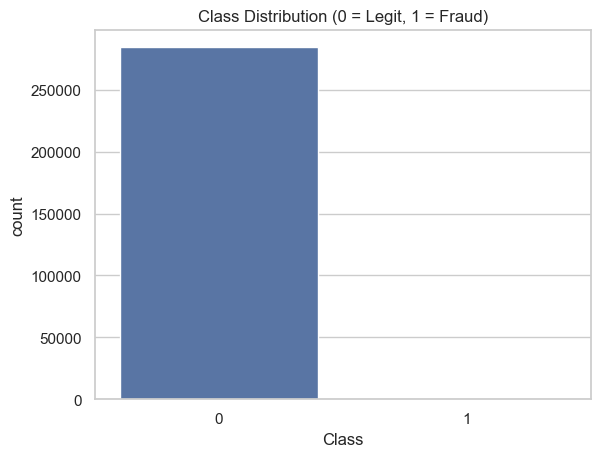

In [4]:
#Class Distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")

plt.savefig("../assets/class_dist.png")

#Fraud Percentage
fraud_pct = df['Class'].mean() * 100
print(f"Fraud cases: {fraud_pct:.4f}%")

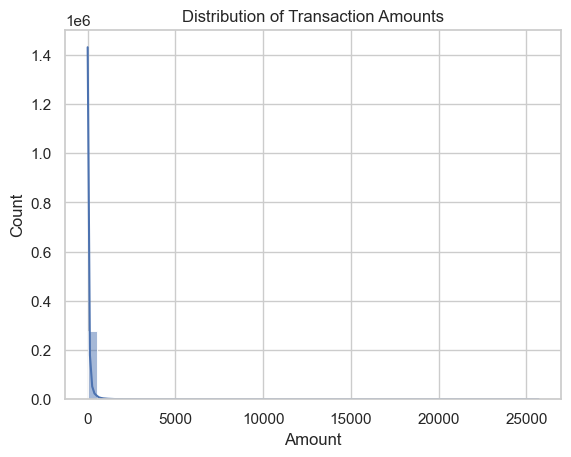

In [6]:
#Transaction Amount
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")

plt.savefig("../assets/amount_dist.png")

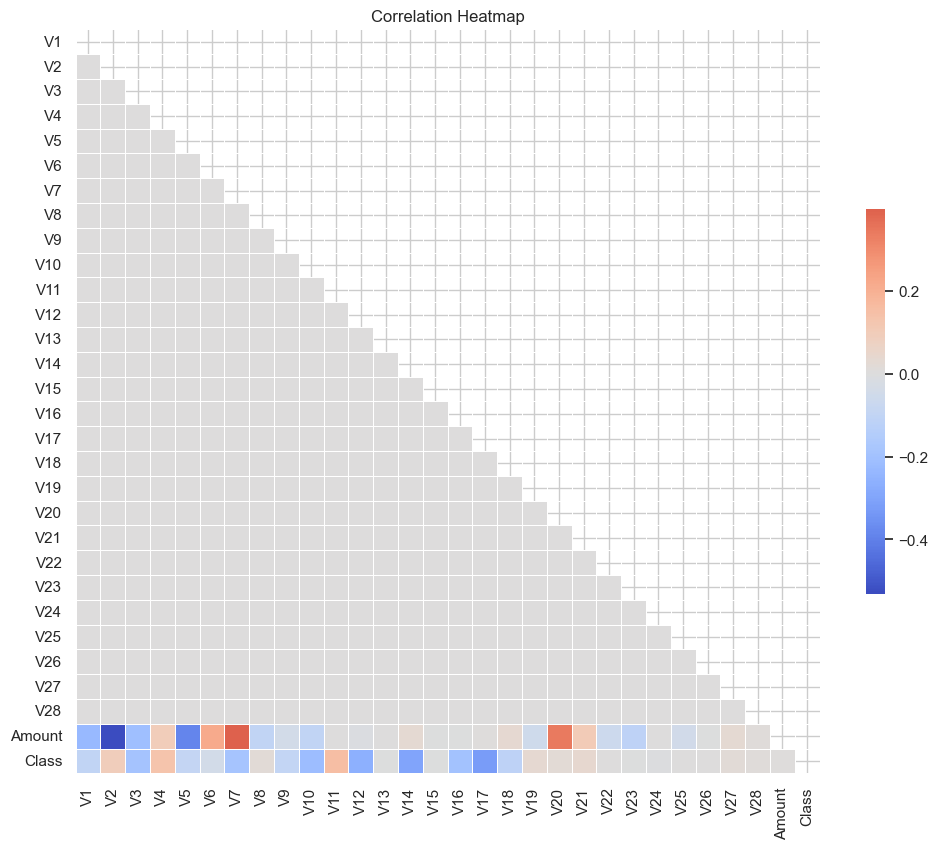

In [7]:
#Correlation Heatmap
corr = df.corr()

#Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Draw the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Heatmap")

plt.savefig("../assets/corr_heatmap.png")

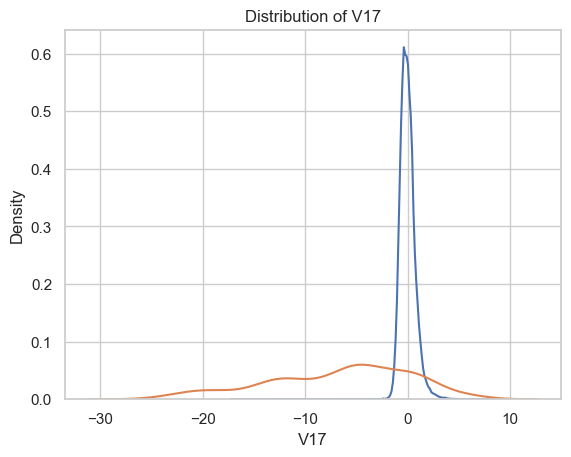

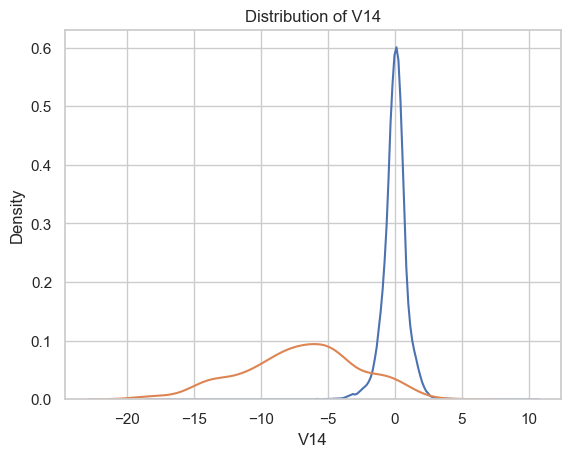

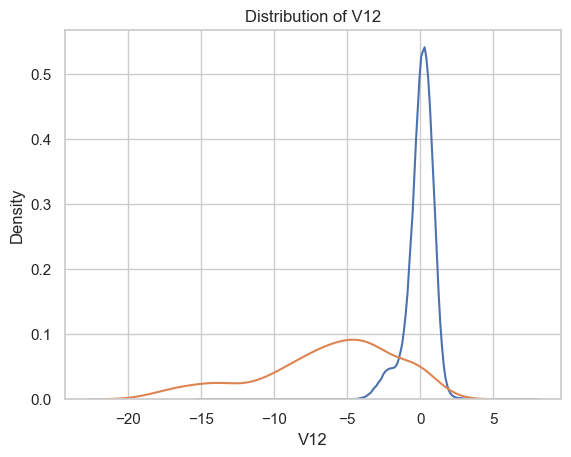

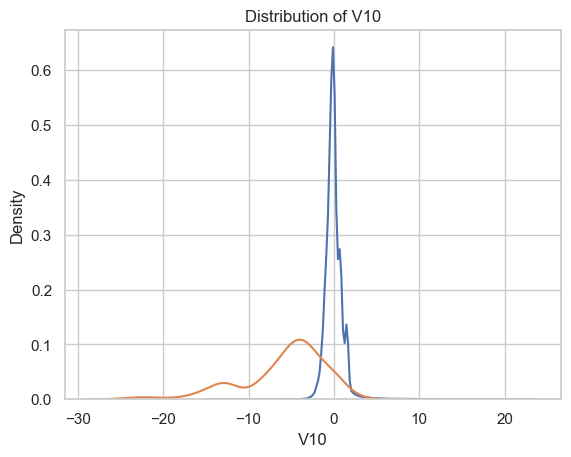

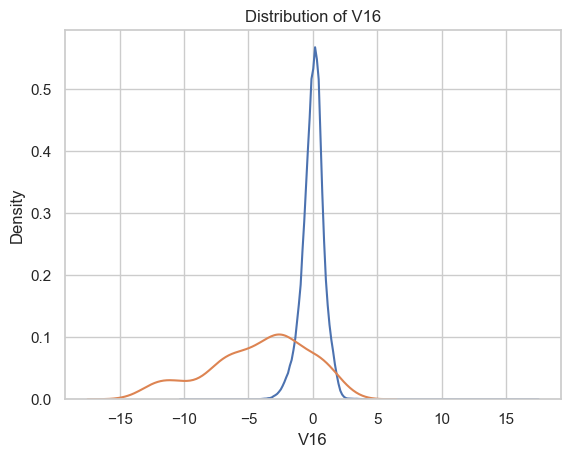

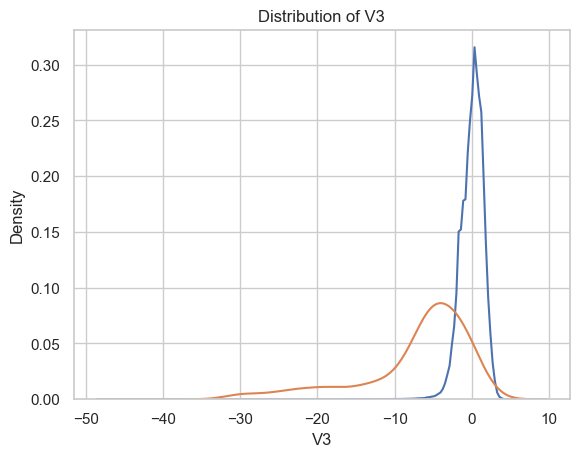

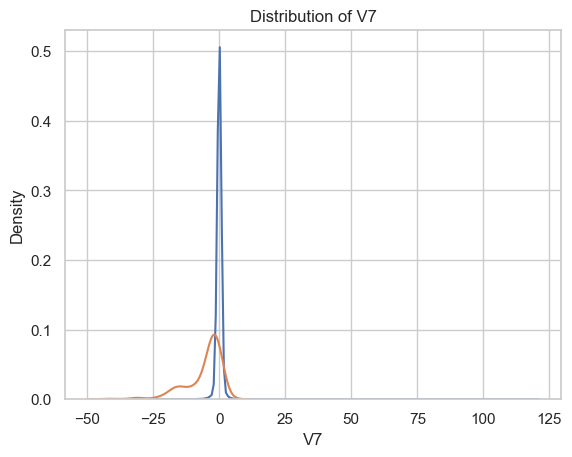

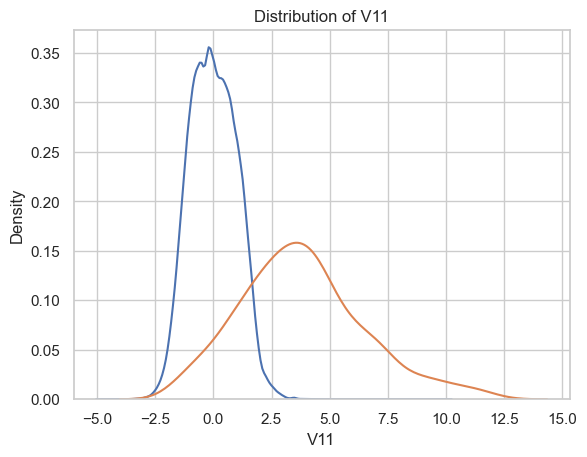

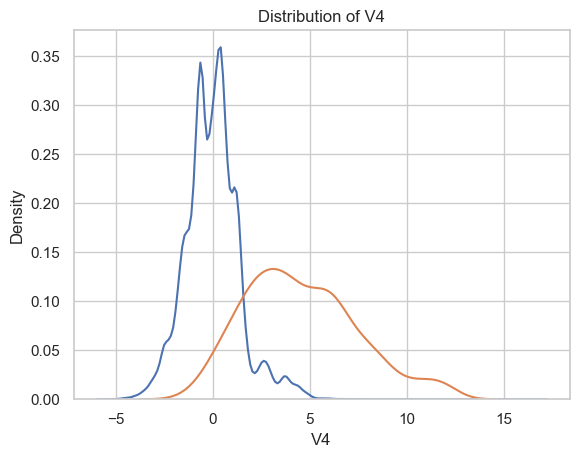

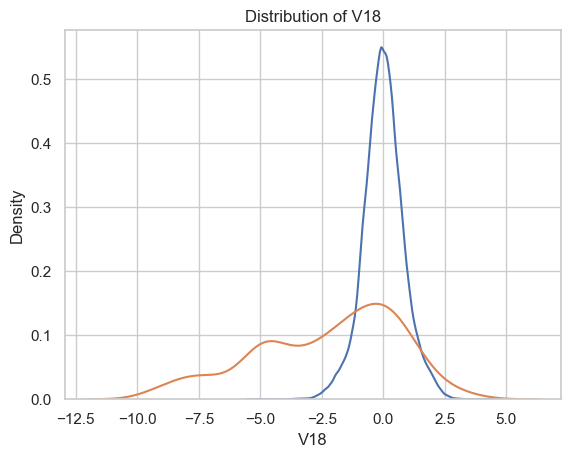

In [8]:
#Absolute correlation with the target
top10_features = df.corr()["Class"].abs().sort_values(ascending=False)

#Select top 10 features excluding 'Class' itself
top10 = top10_features[1:11].index.tolist()

#Distribution of the top 10 correlated features
for col in top10:
    plt.figure()
    sns.kdeplot(df[df['Class']==0][col], label='Legit')
    sns.kdeplot(df[df['Class']==1][col], label='Fraud')
    plt.title(f"Distribution of {col}")

    plt.savefig(f"../assets/{col}_dist.png")